<a href="https://colab.research.google.com/github/Balajilp/Time_Series_EDA_Forecastings/blob/main/Univariate_modelling(Facebook_Propet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Integrating google drive with colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# importing all the necessary libraries for time series analysis
import matplotlib as mpl
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [4]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [5]:
df = pd.read_csv('http://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [8]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [9]:
df.shape

(49205, 4)

In [10]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC energy Demand')
fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                     buttons=list([
                                   dict(count=1, label='1Y', step='year', stepmode='backward'),
                                   dict(count=2, label='3Y', step='year', stepmode='backward'),
                                   dict(count=3, label='5Y', step='year', stepmode='backward'),
                                   dict(step='all')

                     ])
                 ))
fig.show()

In [11]:
ny_df = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f099badf090>,
      dtype=object)

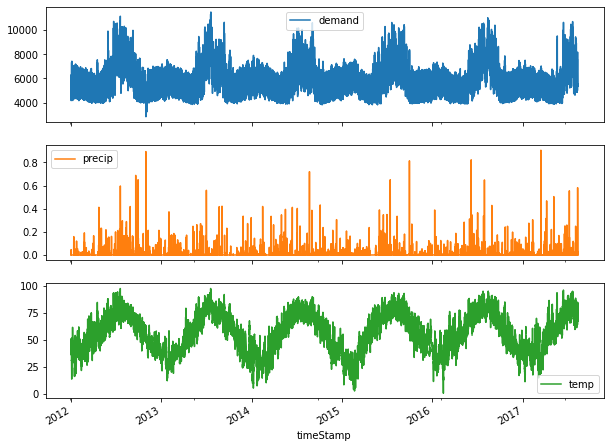

In [12]:
ny_df.plot(subplots=True)

In [13]:
# dataset is on hourly level. so many noise we can convert it into daily level using resample method
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f099ba33150>,
      dtype=object)

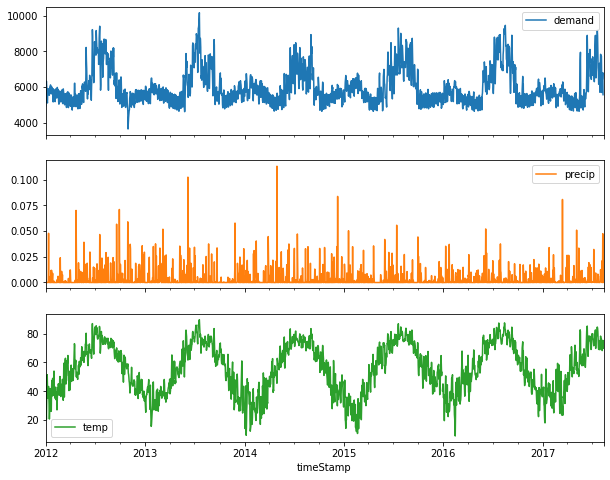

In [14]:
ny_df.resample('D').mean().plot(subplots=True)

In [15]:
# assign it into new dataframe
ny_df_daily = ny_df.resample('D').mean()

In [16]:
# importing facebook porpher
from fbprophet import Prophet

In [18]:
# resetting the index and selecting timestamp and demand columns and renaming it and assining it into a new variable
# we are renaming because facebookpophet expects inputs(features) in this names that's why we aredoing this
# arima model we need to handle null values in fbphrophet it can handle null values.  But based on business requirement we can impute this also
ny_df_final = ny_df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp':'ds', 'demand':'y'}, axis=1)
ny_df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [19]:
# Splitting train and test data
train = ny_df_final[(ny_df_final['ds']>='2012-01-01') & (ny_df_final['ds']<='2017-04-30')]
test = ny_df_final[ny_df_final['ds']>'2017-04-30']

In [20]:
# printing the shape of the training data
train.shape

(1947, 2)

In [21]:
# printing the shape of the test data
test.shape

(104, 2)

In [22]:
# printing the test data
test

,ds,y
1947,2017-05-01,5417.231583
1948,2017-05-02,5697.950042
1949,2017-05-03,5354.628500
1950,2017-05-04,5235.704833
1951,2017-05-05,5358.639500
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [25]:
# Creating a model object
m = Prophet(interval_width=0.95, yearly_seasonality=True) 
# by default confidence interval is 0.80 we are explicitly giving here create a confidence interval for 95%
# by default prophet can able to handle yearly or monthly seasonlity ..but we now it is early seasonlity so we are giving over here

In [26]:
# fitting the training data over here
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#  checking the model parameters
m.params

{'beta': array([[-0.03458069, -0.0705141 ,  0.05760564,  0.04705875, -0.01406572,
         -0.005001  , -0.00386455, -0.00073737,  0.00242053, -0.00755783,
          0.00405203,  0.0048309 , -0.00789597, -0.00470246,  0.00701919,
         -0.00268503, -0.00127789,  0.00170614,  0.00035376, -0.00021813,
         -0.02824817,  0.0238519 ,  0.02062351,  0.00054815, -0.0049496 ,
         -0.00501087]]),
 'delta': array([[ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01,
         -1.12338365e-08,  2.80534300e-09,  1.62508765e-08,
         -5.22679734e-08, -1.16075049e-08, -1.53930702e-07,
         -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
         -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,
          5.85259548e-05, -1.05435640e-07, -8.71744213e-02,
         -4.32663939e-02, -6.02327178e-08,  2.83861158e-08,
          3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
          3.53863651e-07]]),
 'k': array([[0.08895525]]),
 'm': array([[0.59330417]]),
 'sigma_obs': array([

In [28]:
# creating the 104 dates for test dataset
# becasue our test dataset contains 104 rows
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [29]:
# predict the future dates
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,6029.915958,4266.592343,5966.728246,6029.915958,6029.915958,-929.941125,-929.941125,-929.941125,-541.083461,-541.083461,-541.083461,-388.857664,-388.857664,-388.857664,0.0,0.0,0.0,5099.974833
1,2012-01-02,6030.380540,4910.534261,6740.767766,6030.380540,6030.380540,-245.834243,-245.834243,-245.834243,133.880968,133.880968,133.880968,-379.715211,-379.715211,-379.715211,0.0,0.0,0.0,5784.546297
2,2012-01-03,6030.845122,4999.129414,6772.420655,6030.845122,6030.845122,-129.090347,-129.090347,-129.090347,240.795908,240.795908,240.795908,-369.886255,-369.886255,-369.886255,0.0,0.0,0.0,5901.754775
3,2012-01-04,6031.309705,4964.454807,6795.903478,6031.309705,6031.309705,-121.722453,-121.722453,-121.722453,237.724275,237.724275,237.724275,-359.446728,-359.446728,-359.446728,0.0,0.0,0.0,5909.587252
4,2012-01-05,6031.774287,4994.298958,6740.032899,6031.774287,6031.774287,-151.423088,-151.423088,-151.423088,197.057628,197.057628,197.057628,-348.480716,-348.480716,-348.480716,0.0,0.0,0.0,5880.351199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2017-08-08,6085.355996,6668.625677,8571.417354,6057.543961,6109.178222,1502.039334,1502.039334,1502.039334,240.795908,240.795908,240.795908,1261.243426,1261.243426,1261.243426,0.0,0.0,0.0,7587.395330
2047,2017-08-09,6085.371673,6682.235941,8605.345637,6057.111739,6109.585294,1491.137129,1491.137129,1491.137129,237.724275,237.724275,237.724275,1253.412854,1253.412854,1253.412854,0.0,0.0,0.0,7576.508802
2048,2017-08-10,6085.387350,6594.297573,8456.808276,6056.680781,6110.064874,1445.837171,1445.837171,1445.837171,197.057628,197.057628,197.057628,1248.779543,1248.779543,1248.779543,0.0,0.0,0.0,7531.224521
2049,2017-08-11,6085.403027,6579.873526,8404.761555,6056.261764,6110.544454,1401.037542,1401.037542,1401.037542,153.848237,153.848237,153.848237,1247.189305,1247.189305,1247.189305,0.0,0.0,0.0,7486.440569


In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7587.395330,6668.625677,8571.417354
2047,2017-08-09,7576.508802,6682.235941,8605.345637
2048,2017-08-10,7531.224521,6594.297573,8456.808276
2049,2017-08-11,7486.440569,6579.873526,8404.761555
2050,2017-08-12,6911.617225,5975.022021,7879.648100


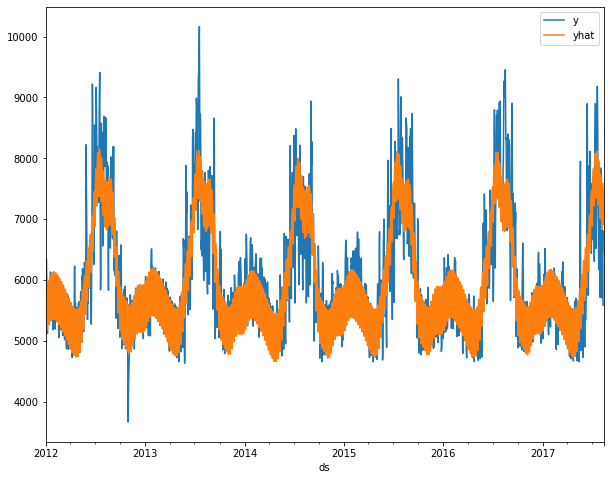

In [31]:
# plotting the forecasting
pd.concat([ny_df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

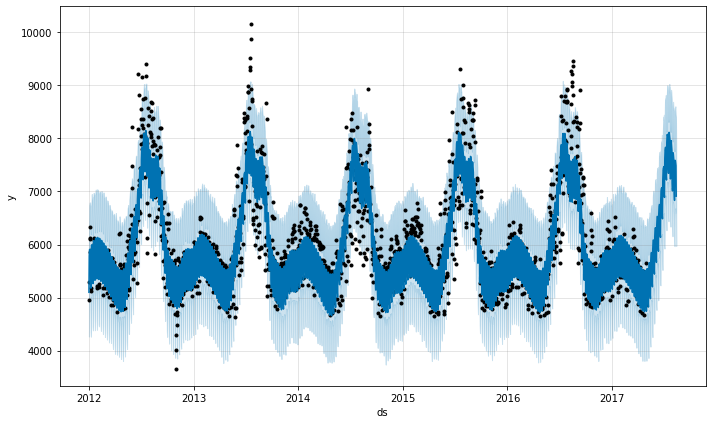

In [32]:
# we can plot the confidence interval
fig1 = m.plot(forecast)

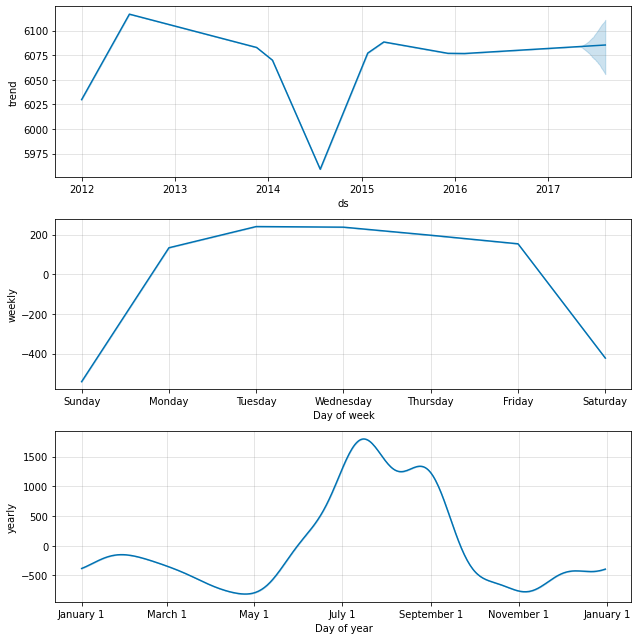

In [35]:
# we can plot the component of the prediction also
fig2 = m.plot_components(forecast)

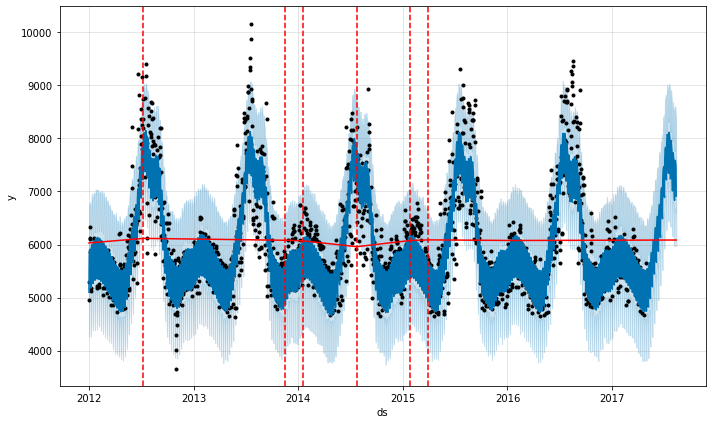

In [36]:
# we can plot the change points as well
# by default it will plot 80% confidence interval change points
# we can customize the change point confidence intervals also
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [37]:
# in mode paramters we take the mean of the deltas
deltas = m.params['delta'].mean(0)
deltas

array([ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01, -1.12338365e-08,
        2.80534300e-09,  1.62508765e-08, -5.22679734e-08, -1.16075049e-08,
       -1.53930702e-07, -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
       -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,  5.85259548e-05,
       -1.05435640e-07, -8.71744213e-02, -4.32663939e-02, -6.02327178e-08,
        2.83861158e-08,  3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
        3.53863651e-07])

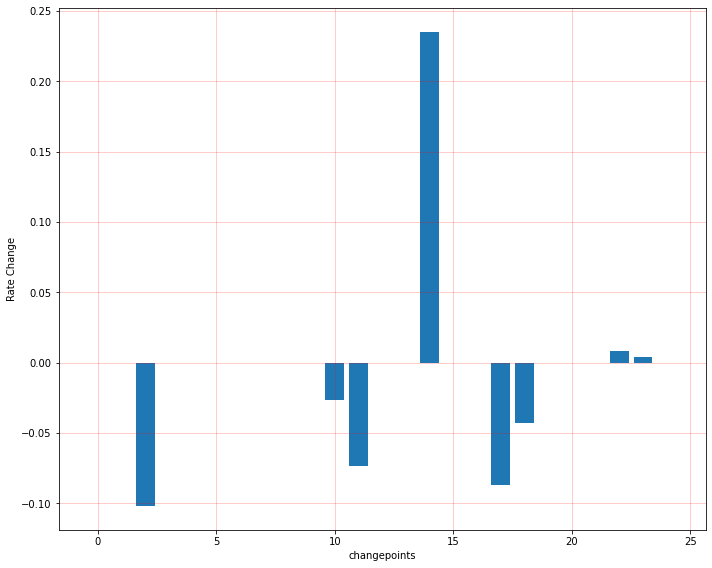

In [39]:
# we can plot the change point changes whether it is a positive change of negative change
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='Major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate Change')
ax.set_xlabel('changepoints')
fig.tight_layout()

In [40]:
# printing the changepoints
m.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


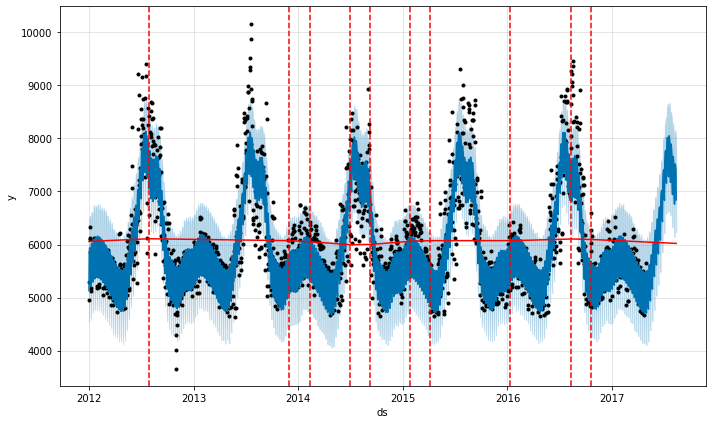

In [42]:
# we can increase the change points to 80 % to 90%
pro_change = Prophet(changepoint_range=0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [44]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)
py.iplot(fig)

In [45]:
# validating our model
from fbprophet.diagnostics import cross_validation
cv_result = cross_validation(model=m, initial='731 days', horizon='365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [46]:
cv_result.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5559.551339,4690.956640,6408.041686,5460.325000,2014-05-01
1,2014-05-03,4969.534110,4081.420287,5857.612679,4893.683333,2014-05-01
2,2014-05-04,4845.648008,4037.694221,5668.356350,4764.137500,2014-05-01
3,2014-05-05,5526.522430,4700.978921,6327.960339,5406.762500,2014-05-01
4,2014-05-06,5621.421825,4777.534501,6428.573291,5409.750000,2014-05-01


In [47]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_result)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251934.957320,501.931228,406.226480,0.073006,0.064884,0.884615
1,37 days 00:00:00,258700.644740,508.626233,413.610053,0.074289,0.066338,0.879121
2,37 days 12:00:00,261010.981546,510.892339,417.001487,0.074872,0.067382,0.879121
3,38 days 00:00:00,263880.662431,513.693160,420.198633,0.075152,0.068328,0.879121
4,38 days 12:00:00,267581.621653,517.282922,425.433592,0.075989,0.069015,0.879121
...,...,...,...,...,...,...,...
653,363 days 00:00:00,259816.478758,509.721962,448.447325,0.082792,0.081943,0.983516
654,363 days 12:00:00,261440.978078,511.312994,449.524741,0.082983,0.081943,0.978022
655,364 days 00:00:00,266023.137790,515.774309,453.230988,0.083848,0.083850,0.978022
656,364 days 12:00:00,266023.939627,515.775086,452.936386,0.083833,0.083850,0.978022
